In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [4]:
df = pd.read_csv("model_input.csv", delimiter=";")
df.drop(['location'],axis=1,inplace=True)
df = df[df['lceq_avg'] != 0]
df.head()

,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85,Telraam data,Weather data,lceq_avg,lcpeak_avg
0,1,1,6,0,0,0,0.00,0,0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0,0,59.9981,76.1733
1,1,1,6,0,10,91,11.65,38,0,0.0,...,13.14485,0.0,0.0,0.0,0.0,0.0,0,1,55.4889,70.5935
2,1,1,6,0,20,90,11.50,37,0,0.0,...,13.14540,0.0,0.0,0.0,0.0,0.0,0,1,57.2715,71.6283
3,1,1,6,0,30,90,11.50,38,0,0.0,...,13.16009,0.0,0.0,0.0,0.0,0.0,0,1,55.4906,69.4174
4,1,1,6,0,40,90,11.50,37,0,0.0,...,13.14488,0.0,0.0,0.0,0.0,0.0,0,1,53.9855,66.8824


In [5]:
airquality = pd.read_csv("Air_Quality.csv", delimiter=",")
airquality['time_stamp'] = pd.to_datetime(airquality['time_stamp'])
airquality['month'] = airquality['time_stamp'].dt.month
airquality['day_month'] = airquality['time_stamp'].dt.day
airquality['day_week'] = airquality['time_stamp'].dt.dayofweek.apply(lambda x: 7 if x == 6 else x + 1)  
airquality['hour'] = airquality['time_stamp'].dt.hour
airquality['minute'] = airquality['time_stamp'].dt.minute
airquality.head()



,time_stamp,2.5_um_count,month,day_month,day_week,hour,minute
0,2022-01-01 00:00:00+00:00,6.419,1,1,6,0,0
1,2022-01-01 00:10:00+00:00,6.258,1,1,6,0,10
2,2022-01-01 00:20:00+00:00,5.772,1,1,6,0,20
3,2022-01-01 00:30:00+00:00,6.499,1,1,6,0,30
4,2022-01-01 00:40:00+00:00,7.046,1,1,6,0,40


In [6]:
# max 2.5_um_count by month
airquality.groupby('month')['2.5_um_count'].max().reset_index()

,month,2.5_um_count
0,1,54.059
1,2,19.920
2,3,60.835
3,4,36.016
4,5,33.352
5,6,52.083
6,7,22.814
7,8,44.112
8,9,13.480
9,10,10.969


In [5]:
merged_df = pd.merge(df, airquality, how='left', on=['month', 'day_month', 'day_week', 'hour', 'minute'])
merged_df.to_csv("merged_df.csv", index=False)
print(merged_df.head())

   month  day_month  day_week  hour  minute  LC_HUMIDITY  LC_DWPTEMP  LC_n  \
0      1          1         6     0       0            0        0.00     0   
1      1          1         6     0      10           91       11.65    38   
2      1          1         6     0      20           90       11.50    37   
3      1          1         6     0      30           90       11.50    38   
4      1          1         6     0      40           90       11.50    37   

   LC_RAD  LC_RAININ  ...  avg_cars  avg_bikes  avg_pedestrians  v85  \
0       0        0.0  ...       0.0        0.0              0.0  0.0   
1       0        0.0  ...       0.0        0.0              0.0  0.0   
2       0        0.0  ...       0.0        0.0              0.0  0.0   
3       0        0.0  ...       0.0        0.0              0.0  0.0   
4       0        0.0  ...       0.0        0.0              0.0  0.0   

   Telraam data  Weather data  lceq_avg  lcpeak_avg                time_stamp  \
0             0  

In [16]:
merged_df.columns

Index(['month', 'day_month', 'day_week', 'hour', 'minute', 'LC_HUMIDITY',
       'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN',
       'LC_WINDDIR', 'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP', 'avg_trucks',
       'avg_cars', 'avg_bikes', 'avg_pedestrians', 'v85', 'Telraam data',
       'Weather data', 'lceq_avg', 'lcpeak_avg', 'time_stamp', '2.5_um_count'],
      dtype='object')

In [7]:
correlation = merged_df["lcpeak_avg"].corr(merged_df["2.5_um_count"])
correlation_avg = merged_df["lceq_avg"].corr(merged_df["2.5_um_count"])
correlation_car = merged_df["2.5_um_count"].corr(merged_df["avg_cars"])
print(correlation, correlation_avg, correlation_car)

-0.08031322075446068 -0.0860879833069896 0.16263431364107364


In [11]:
correlation_values = merged_df.corr()["2.5_um_count"].abs().sort_values(ascending=False)

# Print the ranking of correlation values
print("Ranking of highest correlation factors for 2.5_um_count:")
print(correlation_values[1:])

Ranking of highest correlation factors for 2.5_um_count:
LC_DWPTEMP         0.373923
LC_TEMP            0.346092
month              0.336346
time_stamp         0.332018
avg_cars           0.162634
Telraam data       0.149027
avg_bikes          0.141849
v85                0.137332
LC_WINDSPEED       0.125552
LC_RAD60           0.105439
LC_HUMIDITY        0.104405
LC_RAD             0.088920
lceq_avg           0.086088
lcpeak_avg         0.080313
LC_DAILYRAIN       0.066594
hour               0.054943
day_month          0.044818
avg_trucks         0.037823
LC_WINDDIR         0.036493
day_week           0.032818
LC_RAININ          0.029260
avg_pedestrians    0.022134
LC_n               0.004356
minute             0.000321
Weather data       0.000235
Name: 2.5_um_count, dtype: float64


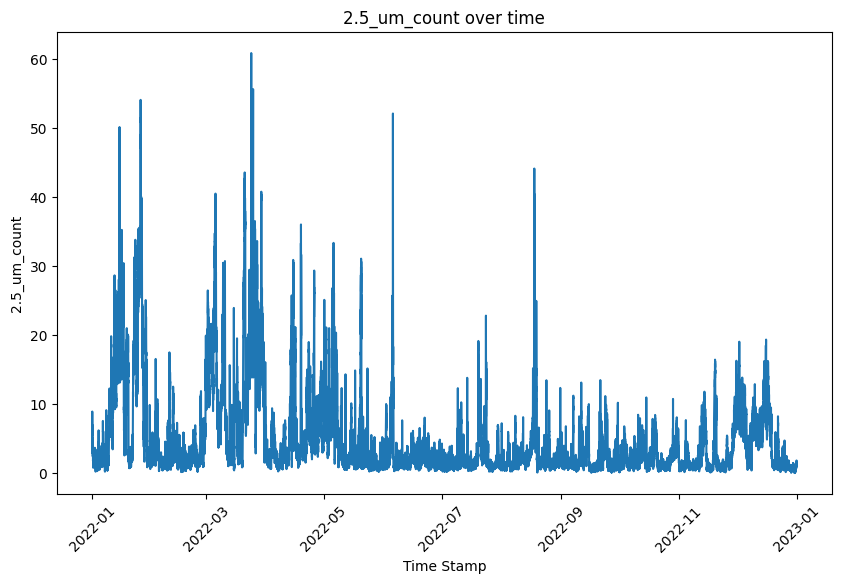

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(airquality["time_stamp"], airquality["2.5_um_count"])
plt.xlabel("Time Stamp")
plt.ylabel("2.5_um_count")
plt.title("2.5_um_count over time")
plt.xticks(rotation=45)
plt.show()

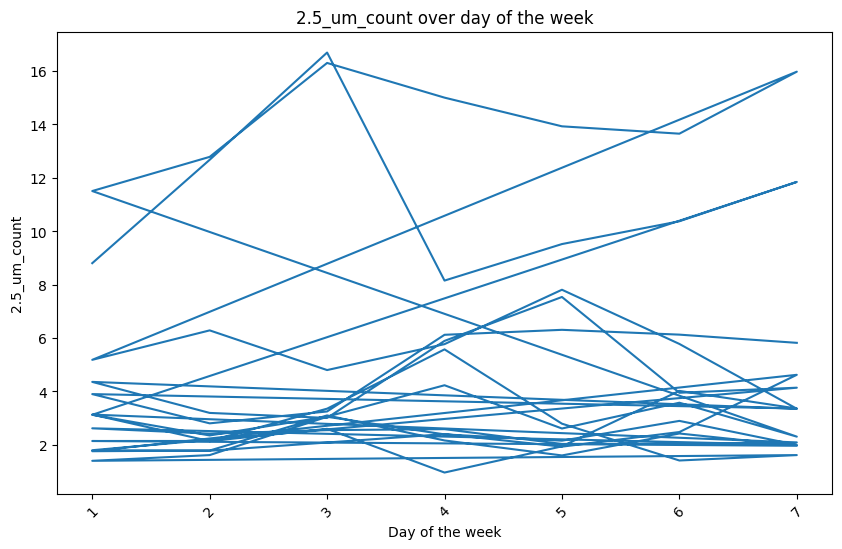

In [7]:
# Grouping the data by month and day of the week and calculating the mean of the 2.5_um_count
grouped_df = airquality.groupby(["month", "day_week"])["2.5_um_count"].mean().reset_index()
grouped_df.head()

# Plotting the grouped data
plt.figure(figsize=(10, 6))
plt.plot(grouped_df["day_week"], grouped_df["2.5_um_count"])
plt.xlabel("Day of the week")
plt.ylabel("2.5_um_count")
plt.title("2.5_um_count over day of the week")
plt.xticks(rotation=45)
plt.show()


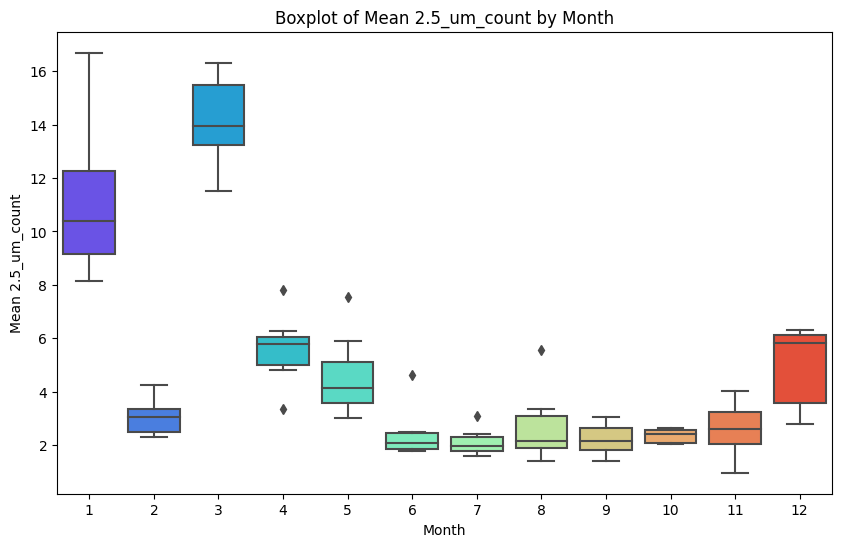

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='2.5_um_count', data=grouped_df, palette='rainbow')
plt.xlabel("Month")
plt.ylabel("Mean 2.5_um_count")
plt.title("Boxplot of Mean 2.5_um_count by Month")
plt.show()


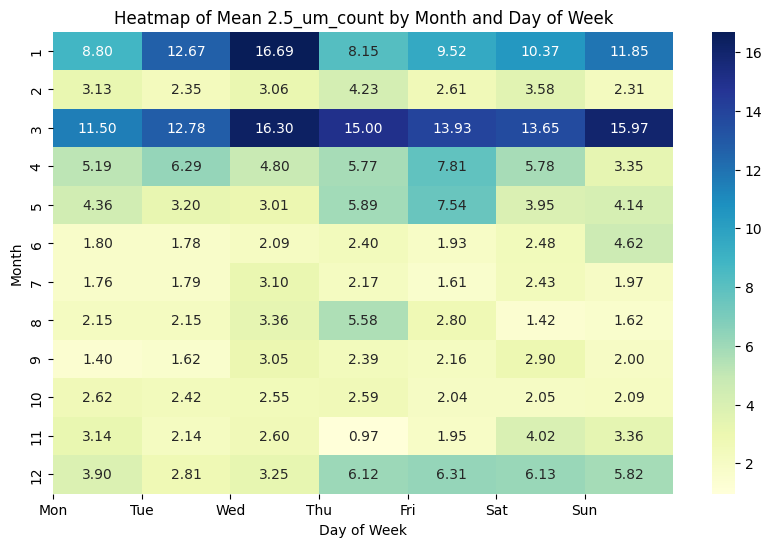

In [29]:
pivot_table = grouped_df.pivot(index='month', columns='day_week', values='2.5_um_count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.xlabel("Day of Week")
plt.ylabel("Month")
plt.title("Heatmap of Mean 2.5_um_count by Month and Day of Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [63]:
import pandas as pd
from dataprep.eda import create_report

# Load the CSV file
df = pd.read_csv('merged_df.csv')

# Print the column names
print(df.columns)

# Specify the column names for analysis
columns_to_analyze = ['month', 'day_month', 'hour', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'avg_cars', 'avg_bikes', 'avg_pedestrians', 'v85', 'lceq_avg', 'lcpeak_avg', '2.5_um_count']

# Select the columns of interest
selected_df = df[columns_to_analyze]

# Create the report
report = create_report(selected_df)
report.show_browser()


Index(['month', 'day_month', 'day_week', 'hour', 'minute', 'LC_HUMIDITY',
       'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN',
       'LC_WINDDIR', 'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP', 'avg_trucks',
       'avg_cars', 'avg_bikes', 'avg_pedestrians', 'v85', 'Telraam data',
       'Weather data', 'lceq_avg', 'lcpeak_avg', 'time_stamp', '2.5_um_count'],
      dtype='object')


  0%|          | 0/3098 [00:00<?, ?it/s]

C:\Users\jadoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [58]:
# Load merged_df and create report
df = pd.read_csv("merged_df.csv", delimiter=",")
df.head()
# report = create_report(df)
# report.save("report.html")


,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,avg_cars,avg_bikes,avg_pedestrians,v85,Telraam data,Weather data,lceq_avg,lcpeak_avg,time_stamp,2.5_um_count
0,1,1,6,0,0,0,0.00,0,0,0.0,...,0.0,0.0,0.0,0.0,0,0,59.9981,76.1733,2022-01-01 00:00:00+00:00,6.419
1,1,1,6,0,10,91,11.65,38,0,0.0,...,0.0,0.0,0.0,0.0,0,1,55.4889,70.5935,2022-01-01 00:10:00+00:00,6.258
2,1,1,6,0,20,90,11.50,37,0,0.0,...,0.0,0.0,0.0,0.0,0,1,57.2715,71.6283,2022-01-01 00:20:00+00:00,5.772
3,1,1,6,0,30,90,11.50,38,0,0.0,...,0.0,0.0,0.0,0.0,0,1,55.4906,69.4174,2022-01-01 00:30:00+00:00,6.499
4,1,1,6,0,40,90,11.50,37,0,0.0,...,0.0,0.0,0.0,0.0,0,1,53.9855,66.8824,2022-01-01 00:40:00+00:00,7.046


In [9]:
# drop columns 'lcpeak_avg', 'lceq_avg', 'v85', 'Telraam data', 'avg_pedestrians', 'avg_bikes', 'avg_cars', 'avg_trucks' from merged_df
new_df = merged_df.drop(['lcpeak_avg', 'lceq_avg', 'v85', 'Telraam data', 'avg_pedestrians', 'avg_bikes', 'avg_cars', 'avg_trucks' ], axis=1)


In [6]:
new_df.head()

,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP,Weather data,time_stamp,2.5_um_count
0,1,1,6,0,0,0,0.00,0,0,0.0,0.0,0,0.00,0,0.00000,0,2022-01-01 00:00:00+00:00,6.419
1,1,1,6,0,10,91,11.65,38,0,0.0,0.0,174,0.11,0,13.14485,1,2022-01-01 00:10:00+00:00,6.258
2,1,1,6,0,20,90,11.50,37,0,0.0,0.0,-13,0.20,0,13.14540,1,2022-01-01 00:20:00+00:00,5.772
3,1,1,6,0,30,90,11.50,38,0,0.0,0.0,-31,0.16,0,13.16009,1,2022-01-01 00:30:00+00:00,6.499
4,1,1,6,0,40,90,11.50,37,0,0.0,0.0,-56,0.08,0,13.14488,1,2022-01-01 00:40:00+00:00,7.046


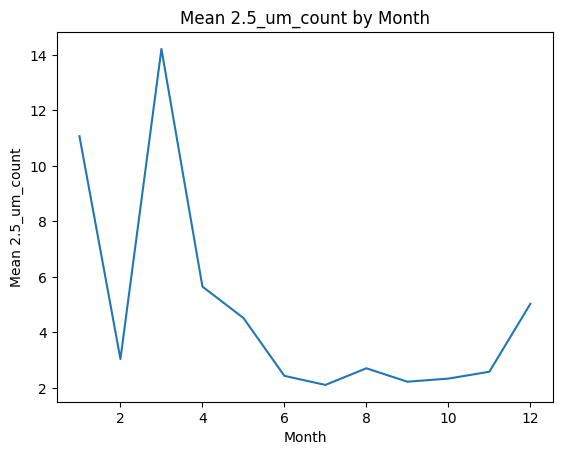

In [10]:
# Group the data by month and calculate the mean of '2.5_um_count'
grouped_df = new_df.groupby('month')['2.5_um_count'].mean().reset_index()

# Line plot: Mean 2.5_um_count by month
plt.plot(grouped_df['month'], grouped_df['2.5_um_count'])
plt.xlabel('Month')
plt.ylabel('Mean 2.5_um_count')
plt.title('Mean 2.5_um_count by Month')
plt.show()


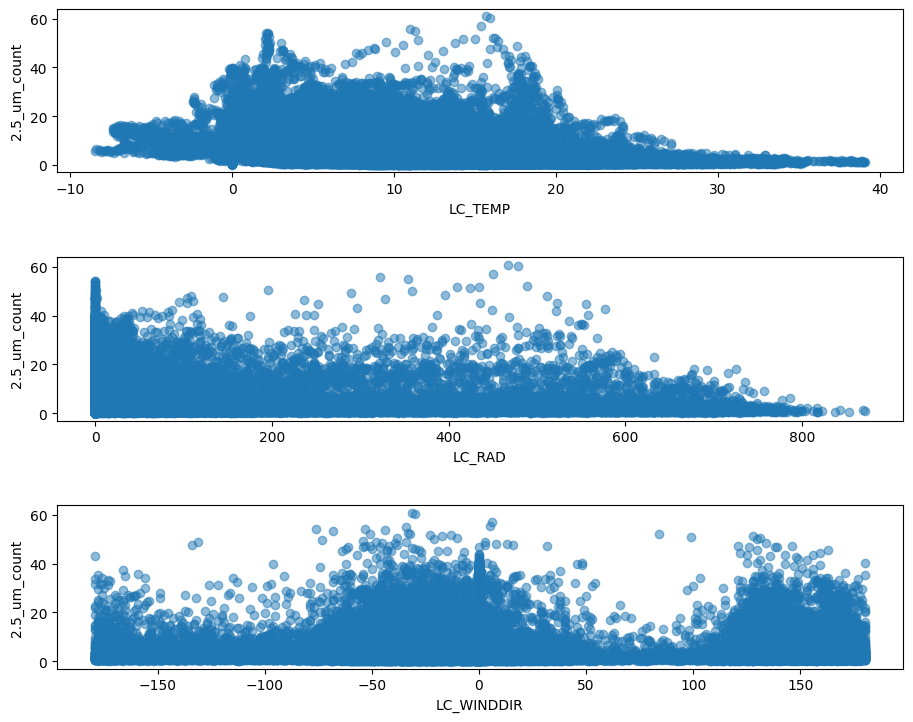

In [30]:
# Select the columns of interest
columns_of_interest = ['LC_TEMP', 'LC_RAD', 'LC_WINDDIR']

# Create subplots for each weather parameter
fig, axes = plt.subplots(len(columns_of_interest), 1, figsize=(10, 8))
fig.tight_layout(pad=4)

# Iterate over the weather parameters and create scatter plots
for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    ax.scatter(new_df[column], new_df['2.5_um_count'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('2.5_um_count')

plt.show()

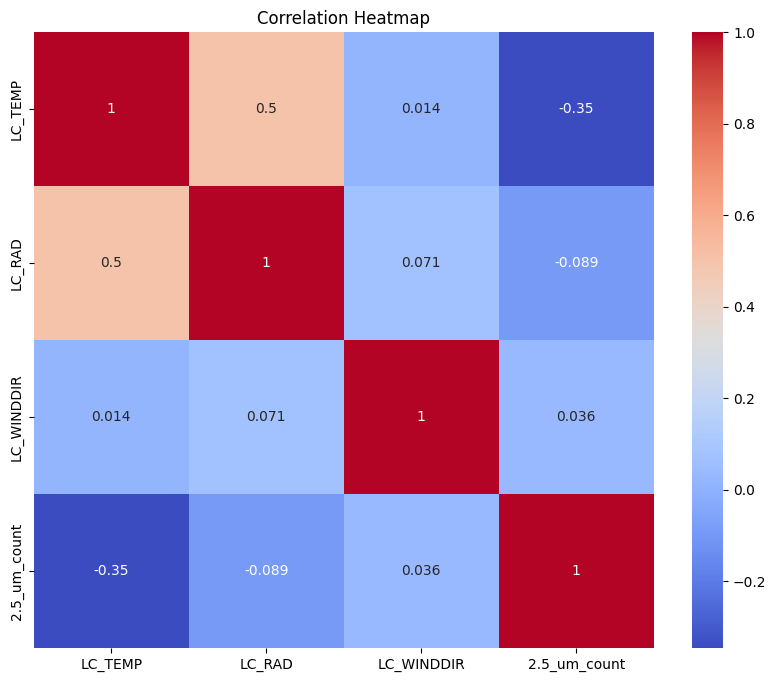

In [33]:
columns_of_interest = ['LC_TEMP', 'LC_RAD', 'LC_WINDDIR', '2.5_um_count']
corr_matrix = new_df[columns_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

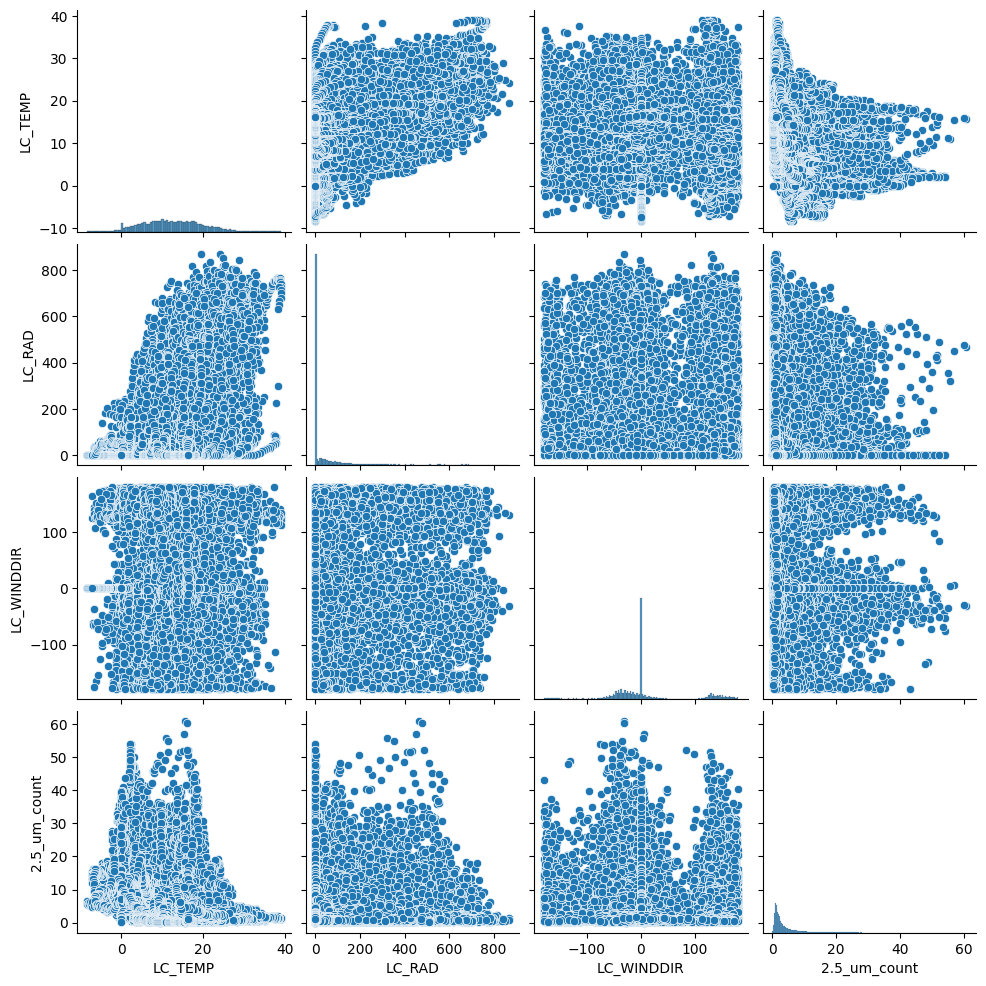

In [35]:
columns_of_interest = ['LC_TEMP', 'LC_RAD', 'LC_WINDDIR']
sns.pairplot(new_df[columns_of_interest + ['2.5_um_count']])
plt.show()

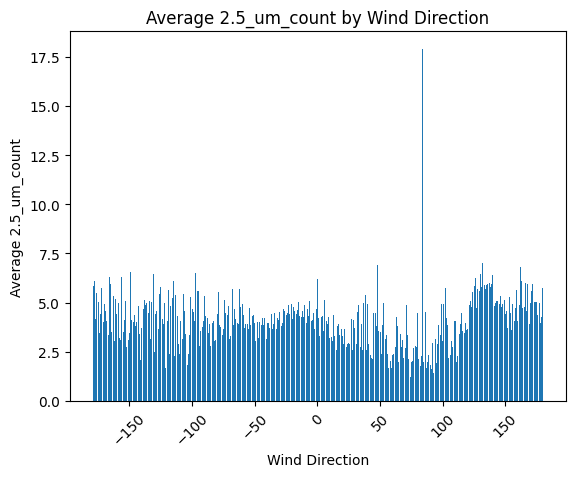

In [36]:
wind_directions = new_df['LC_WINDDIR'].unique()
avg_counts = [new_df[new_df['LC_WINDDIR'] == dir]['2.5_um_count'].mean() for dir in wind_directions]

plt.bar(wind_directions, avg_counts)
plt.xlabel('Wind Direction')
plt.ylabel('Average 2.5_um_count')
plt.title('Average 2.5_um_count by Wind Direction')
plt.xticks(rotation=45)
plt.show()